In [19]:
# Importing libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [20]:
#Read CSV File 
Housedata = pd.read_csv('C:\\Users\\Admin\\Desktop\\Data science\\Machine Learning\\Linear Regression\\Data+Code\\Maison.csv')

In [21]:
Housedata

,PRIX,SUPERFICIE,CHAMBRES,SDB,ETAGES,ALLEE,SALLEJEU,CAVE,GAZ,AIR,GARAGES,SITUATION
0,42000,5850,3,1,2,1,0,1,0,0,1,0
1,38500,4000,2,1,1,1,0,0,0,0,0,0
2,49500,3060,3,1,1,1,0,0,0,0,0,0
3,60500,6650,3,1,2,1,1,0,0,0,0,0
4,61000,6360,2,1,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
541,91500,4800,3,2,4,1,1,0,0,1,0,0
542,94000,6000,3,2,4,1,0,0,0,1,0,0
543,103000,6000,3,2,4,1,1,0,0,1,1,0
544,105000,6000,3,2,2,1,1,0,0,1,1,0


In [22]:
#Peeking the data
Housedata.shape

(546, 12)

In [23]:
# change the name of the columns as they are in different language
Housedata = Housedata.rename(columns={'PRIX': 'Price', 'SUPERFICIE': 'Area','CHAMBRES': 'Rooms','SDB':'Bathrooms',
                                      'ETAGES':'Floors','ALLEE':'Driveway','SALLEJEU':'GameRoom','CAVE':'Cellar','GAZ':'Gas',
                                     'AIR':'Air','GARAGES':'Garages','SITUATION':'Stituation'})
Housedata

,Price,Area,Rooms,Bathrooms,Floors,Driveway,GameRoom,Cellar,Gas,Air,Garages,Stituation
0,42000,5850,3,1,2,1,0,1,0,0,1,0
1,38500,4000,2,1,1,1,0,0,0,0,0,0
2,49500,3060,3,1,1,1,0,0,0,0,0,0
3,60500,6650,3,1,2,1,1,0,0,0,0,0
4,61000,6360,2,1,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
541,91500,4800,3,2,4,1,1,0,0,1,0,0
542,94000,6000,3,2,4,1,0,0,0,1,0,0
543,103000,6000,3,2,4,1,1,0,0,1,1,0
544,105000,6000,3,2,2,1,1,0,0,1,1,0


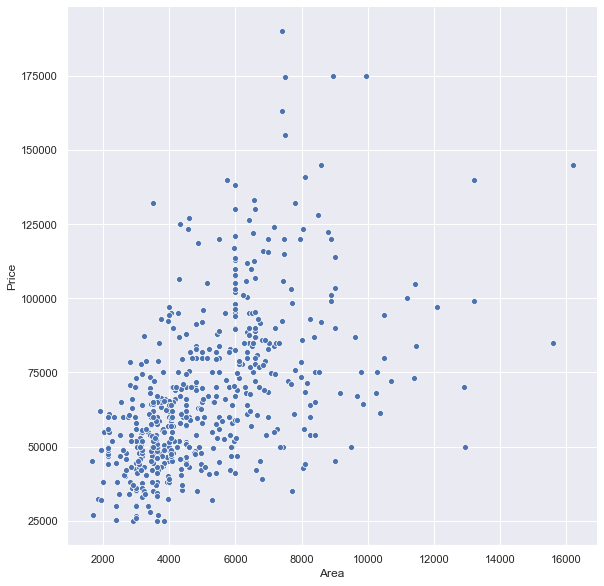

In [65]:
#Visualization
sns.pairplot(Housedata, x_vars = ['Area'], y_vars = 'Price', size = 8, kind = 'scatter')

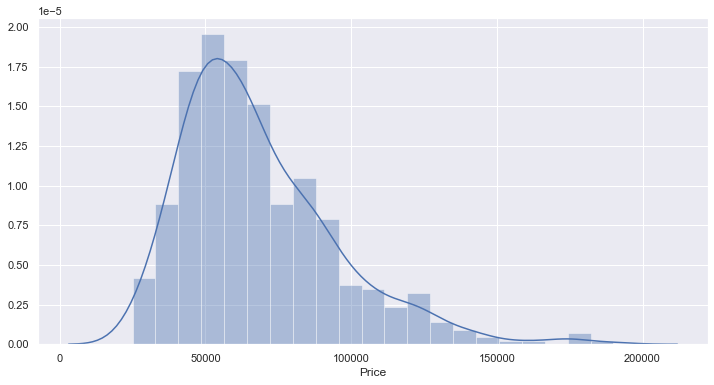

In [34]:
plt.rcParams['figure.figsize'] = [12,6]
sns.distplot(Housedata['Price'])
plt.show()

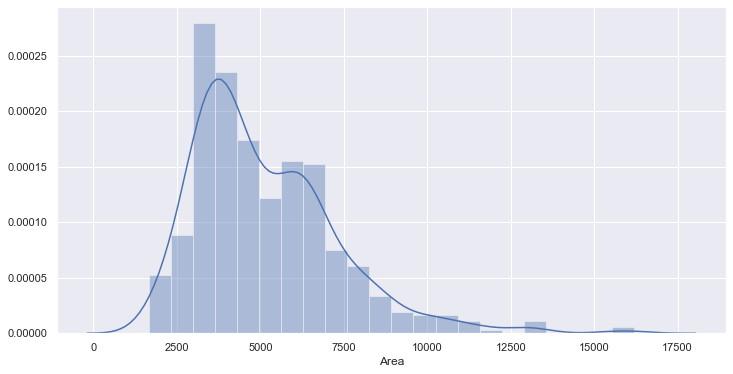

In [31]:
sns.distplot(Housedata['Area'])
plt.show()

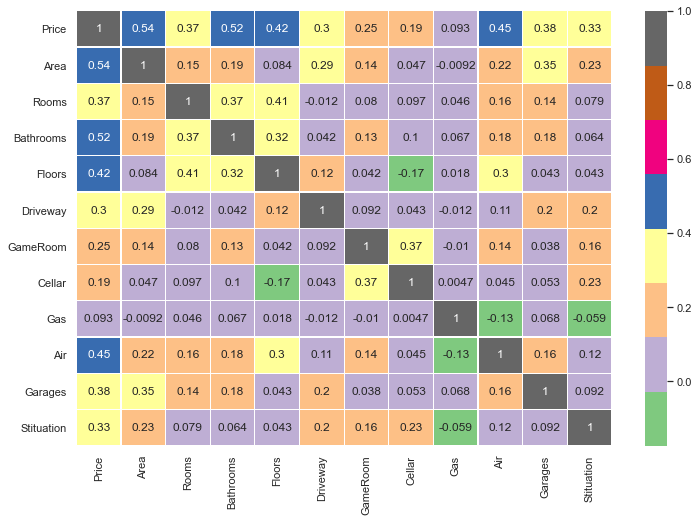

In [50]:
##Correlation 
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(Housedata.corr(), cmap = "Accent",annot = True,linewidths=.2,ax = ax)
plt.show()

In [52]:
X = Housedata['Area']
Y = Housedata['Price']

In [75]:
#Splitting the data into Train and Test (with split ratio = 80-20)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size = 0.7, test_size = 0.3, random_state = 5)

In [76]:
X_train

122    4400
9      5500
297    3120
203    3180
509    4040
       ... 
8      4800
73     2475
400    7410
118    4300
206    2325
Name: Area, Length: 382, dtype: int64

In [77]:
y_train

122     37000
9       88500
297     50000
203     55500
509     64000
        ...  
8       83800
73      34000
400     92500
118    106500
206     60000
Name: Price, Length: 382, dtype: int64

In [78]:
import statsmodels.api as sm
#Adding a constant (to get an intercept)
X_train_sm = sm.add_constant(X_train)
X_train_sm

,const,Area
122,1.0,4400
9,1.0,5500
297,1.0,3120
203,1.0,3180
509,1.0,4040
...,...,...
8,1.0,4800
73,1.0,2475
400,1.0,7410
118,1.0,4300


In [79]:
#Fitting the regression model using OLS (of SM)
lr = sm.OLS(y_train, X_train_sm).fit()
lr.params

const    31467.299827
Area         7.156749
dtype: float64

In [80]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     152.0
Date:                Thu, 25 Feb 2021   Prob (F-statistic):           1.31e-29
Time:                        00:15:04   Log-Likelihood:                -4388.4
No. Observations:                 382   AIC:                             8781.
Df Residuals:                     380   BIC:                             8789.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.147e+04   3206.297      9.814      0.000    2.52e+04    3.78e+04
Area           7.1567      0.580     12.329      0.000       6.015       8.298
==============================================================================
Omnibus:                       69.556   Durbin-Watson:                   1.842
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              142.142
Skew:                           0.968   Prob(JB):                     1.36e-31
Kurtosis:                       5.277   Cond. No.                     1.46e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.46e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

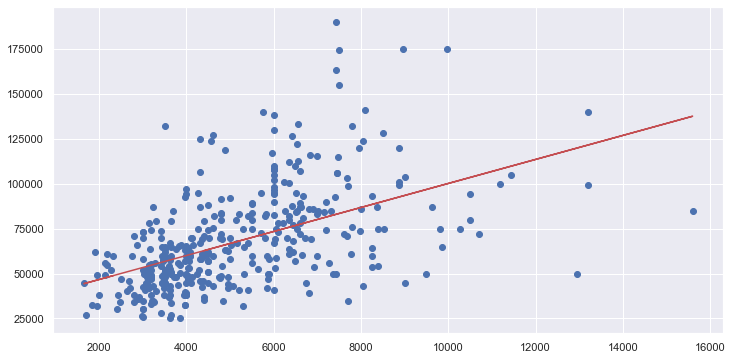

In [81]:
#Visualize the regression line - best fit line
plt.scatter(X_train, y_train)
plt.plot(X_train, 33333.4 + 6.68 * X_train, 'r')
plt.show()

In [82]:
# Error analysis 
y_train_pred = lr.predict(X_train_sm)
residualerror = y_train - y_train_pred
residualerror

122   -25956.993466
9      17670.583125
297    -3796.355316
203     1274.239770
509     3619.436014
           ...     
8      17980.307113
73    -15180.252499
400     8001.193386
118    44258.681390
206    11893.259784
Length: 382, dtype: float64

Text(0, 0.5, 'freq')

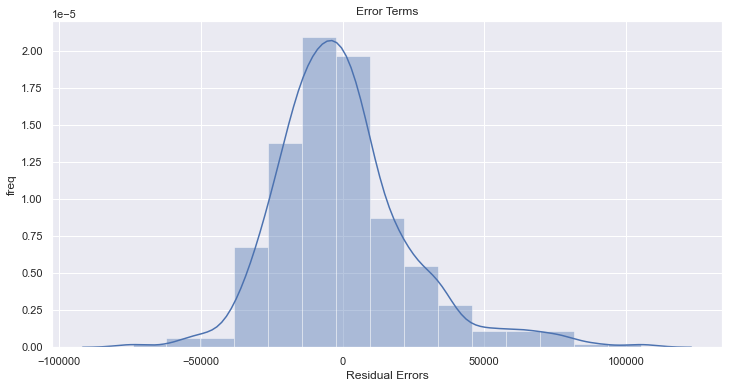

In [83]:
sns.distplot(residualerror , bins = 15)
plt.title('Error Terms')
plt.xlabel('Residual Errors')
plt.ylabel('freq')

In [84]:
# Error analysis on test data
X_test_sm = sm.add_constant(X_test)
y_test_pred = lr.predict(X_test_sm)
residual_test = (y_test - y_test_pred)
residual_test

288   -25513.974969
526    36675.445119
496    -3672.668321
483    -8594.294044
409    11198.159715
           ...     
342   -26613.159646
153   -15231.594622
459      181.474524
261   -11317.864564
423    10821.264337
Length: 164, dtype: float64

Text(0, 0.5, 'freq')

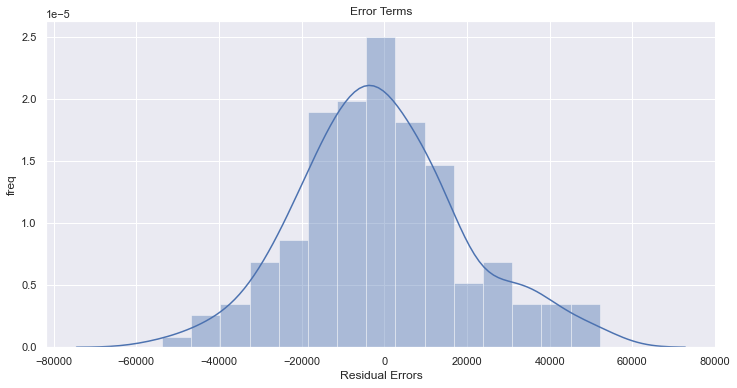

In [85]:
sns.distplot(residual_test, bins = 15)
plt.title('Error Terms')
plt.xlabel('Residual Errors')
plt.ylabel('freq')

In [86]:
from sklearn.metrics import r2_score
r_sq = r2_score(y_test, y_test_pred)
r_sq

0.28245160387329504